# **Case Study : Telecom Churn Case Study**

# # **Problem Statement**
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

# # **Business Goal**
In this project, We will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Loading Modules & Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

from scipy import special 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML

#Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold,cross_val_score,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA , IncrementalPCA
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from scipy import stats
from imblearn.over_sampling import SMOTE
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




/kaggle/input/telecom-churn-case-study-hackathon-38/data_dictionary.csv
/kaggle/input/telecom-churn-case-study-hackathon-38/solution (1).csv
/kaggle/input/telecom-churn-case-study-hackathon-38/train (1).csv
/kaggle/input/telecom-churn-case-study-hackathon-38/test (1).csv


# Reading and Analyzing All Data Provided

In [2]:
data = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-38/train (1).csv")
unseen = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-38/test (1).csv")
sample = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-38/solution (1).csv")
data_dict = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-38/data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [3]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center



# **Data Cleaning**
* <font size="5">In this Stage We will Identify Missing columns and Columns with unique Values.</font>
* <font size="5">We will then remove these as it is not necessary and will not provide any extra insights to the analysis we will be doing.</font>
*  <font size="5">Impute Missing Values</font>

In [4]:
# Identify the date columns
date_cols = [k for k in data.columns.to_list() if 'date' in k]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [5]:
#Drop Date Columns
data=data.drop(date_cols,axis=1)

In [6]:
# Identify the Recharge columns
recharge_cols = [k for k in data.columns.to_list() if 'rech' in k]
recharge_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [7]:
# Impute Recharge columns with 0
for col in recharge_cols:
    data[col]=data[col].fillna(0)
# Checking percent of missing values in columns
data_missing_columns = (100*(data.isnull().sum()/len(data.index)).to_frame('null')).sort_values('null',ascending=False)
data_missing_columns

,null
night_pck_user_6,74.902499
arpu_3g_6,74.902499
arpu_2g_6,74.902499
fb_user_6,74.902499
fb_user_7,74.478207
...,...
total_rech_data_6,0.000000
last_day_rch_amt_8,0.000000
last_day_rch_amt_7,0.000000
last_day_rch_amt_6,0.000000


In [8]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(data_missing_columns.index[data_missing_columns['null'] > 30])
col_list_missing_30

['night_pck_user_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'fb_user_6',
 'fb_user_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'arpu_3g_8',
 'arpu_2g_8',
 'fb_user_8',
 'night_pck_user_8']

In [9]:
# Drop the columns having more than 30% missing values
train_data = data.drop(col_list_missing_30, axis=1)
#Check shape
train_data.shape

(69999, 151)

In [10]:
# Checking again missing values in columns
data_missing_columns = train_data.isnull().sum().to_frame('null').sort_values('null',ascending=False)
data_missing_columns

,null
isd_og_mou_8,3703
std_og_t2c_mou_8,3703
std_ic_t2t_mou_8,3703
loc_og_t2t_mou_8,3703
loc_og_t2m_mou_8,3703
...,...
total_rech_data_7,0
total_rech_data_8,0
max_rech_data_6,0
max_rech_data_7,0


In [11]:
# drop columns with more than 3000 missing values
col_list_3000 = list(data_missing_columns.index[data_missing_columns['null'] >=3000])
col_list_3000

['isd_og_mou_8',
 'std_og_t2c_mou_8',
 'std_ic_t2t_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_mou_8',
 'std_ic_t2o_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'std_ic_mou_8',
 'std_ic_t2m_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_og_mou_8',
 'std_ic_t2f_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2f_mou_8',
 'roam_og_mou_8',
 'std_og_t2m_mou_8',
 'isd_ic_mou_8',
 'spl_og_mou_8',
 'ic_others_8',
 'loc_ic_t2t_mou_8',
 'offnet_mou_8',
 'loc_ic_mou_8',
 'og_others_8',
 'onnet_mou_8',
 'roam_ic_mou_8',
 'spl_ic_mou_8',
 'loc_ic_t2f_mou_8']

In [12]:
# Drop the columns having more 3000+ missing values
train_data = train_data.drop(col_list_3000, axis=1)
# Check the shape
train_data.shape

(69999, 122)

In [13]:
# Checking columns with unique values
unique_value_cols=train_data.nunique(dropna=True).to_frame('Unique_Values').sort_values('Unique_Values',ascending=True)
unique_value_cols

,Unique_Values
std_ic_t2o_mou_7,1
circle_id,1
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
...,...
total_og_mou_7,33195
arpu_8,60194
arpu_7,61425
arpu_6,61615


In [14]:
# drop columns with unique values
unique_cols = list(unique_value_cols.index[unique_value_cols['Unique_Values'] ==1])
train_data = train_data.drop(unique_cols, axis=1)
# Checking shape
train_data.shape

(69999, 114)

In [15]:
# Checking again missing values in columns
data_missing_columns = train_data.isnull().sum().to_frame('null').sort_values('null',ascending=False)
data_missing_columns

,null
og_others_6,2768
loc_og_t2f_mou_6,2768
loc_ic_t2m_mou_6,2768
loc_ic_t2f_mou_6,2768
spl_og_mou_6,2768
...,...
total_rech_data_8,0
max_rech_data_6,0
max_rech_data_7,0
max_rech_data_8,0


In [16]:
# Since there are more number of null values we are dropping cols greater than 2678
col_list_2678 = list(data_missing_columns.index[data_missing_columns['null'] >=2678])
train_data = train_data.drop(col_list_2678, axis=1)
#Check shape
train_data.shape

(69999, 60)

In [17]:
# Checking again missing values in columns
data_missing_columns = train_data.isnull().sum().to_frame('null').sort_values('null',ascending=False)
data_missing_columns

,null
id,0
arpu_6,0
count_rech_3g_7,0
count_rech_3g_8,0
av_rech_amt_data_6,0
av_rech_amt_data_7,0
av_rech_amt_data_8,0
vol_2g_mb_6,0
vol_2g_mb_7,0
vol_2g_mb_8,0


In [18]:
# Checking again columns with unique values
unique_cols=train_data.nunique(dropna=True).to_frame('Unique_Values').sort_values('Unique_Values',ascending=True)
unique_cols

,Unique_Values
churn_probability,2
monthly_2g_6,5
monthly_2g_8,6
monthly_2g_7,6
monthly_3g_6,10
monthly_3g_8,12
monthly_3g_7,13
sachet_3g_6,23
count_rech_3g_6,23
sachet_3g_7,26


In [19]:
# drop columns with unique values
unique_cols = list(unique_cols.index[unique_cols['Unique_Values'] ==1])
train_data = train_data.drop(unique_cols, axis=1)
# Drop Id column which is not useful for analysis
train_data = train_data.drop('id', axis=1)
#Check info again
train_data.info()
#Check the shape
train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              69999 non-null  float64
 1   arpu_7              69999 non-null  float64
 2   arpu_8              69999 non-null  float64
 3   total_og_mou_6      69999 non-null  float64
 4   total_og_mou_7      69999 non-null  float64
 5   total_og_mou_8      69999 non-null  float64
 6   total_ic_mou_6      69999 non-null  float64
 7   total_ic_mou_7      69999 non-null  float64
 8   total_ic_mou_8      69999 non-null  float64
 9   total_rech_num_6    69999 non-null  int64  
 10  total_rech_num_7    69999 non-null  int64  
 11  total_rech_num_8    69999 non-null  int64  
 12  total_rech_amt_6    69999 non-null  int64  
 13  total_rech_amt_7    69999 non-null  int64  
 14  total_rech_amt_8    69999 non-null  int64  
 15  max_rech_amt_6      69999 non-null  int64  
 16  max_

(69999, 59)

In [20]:
# Checking columns with unique values
unique_cols=train_data.nunique(dropna=True).to_frame('Unique_Values').sort_values('Unique_Values',ascending=True)
unique_cols

,Unique_Values
churn_probability,2
monthly_2g_6,5
monthly_2g_8,6
monthly_2g_7,6
monthly_3g_6,10
monthly_3g_8,12
monthly_3g_7,13
sachet_3g_6,23
count_rech_3g_6,23
sachet_3g_7,26


In [21]:
#Remove outliers
z = np.abs(stats.zscore(train_data))
selected = train_data[(z < 3).all(axis=1)]
train_data = train_data.loc[selected.index]

In [22]:
# Checking columns with unique values
unique_cols=train_data.nunique(dropna=True).to_frame('Unique_Values').sort_values('Unique_Values',ascending=True)
unique_cols.head()

,Unique_Values
monthly_2g_8,1
monthly_2g_7,1
monthly_2g_6,1
churn_probability,2
sachet_3g_7,2


In [23]:
# drop columns with unique values
unique_cols = list(unique_cols.index[unique_cols['Unique_Values'] ==1])
train_data = train_data.drop(unique_cols, axis=1)
#Check shape
train_data.shape

(47972, 56)

# **EDA**
<font size="5">We will now do EDA on the cleaned dataset</font>

# Univariate Analysis

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

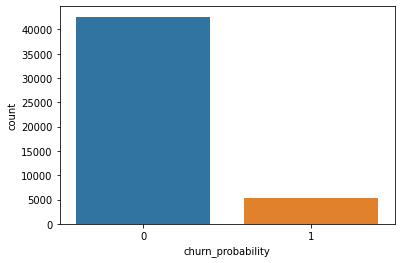

In [24]:
# Plot countplot for churn 
sns.countplot(x="churn_probability",data = train_data)

<font size="5">**Observation**:</font><br>
<font size="5">Churn rate is low in overall data, there is a class imbalance</font>

<AxesSubplot:xlabel='aon', ylabel='Density'>

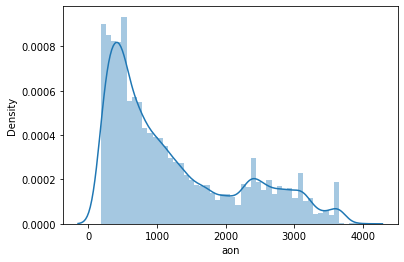

In [25]:
# Plot distplot for aon
sns.distplot(train_data['aon'])

<font size="5">**Observation**:</font><br>
<font size="5">The age of the network is initially high,it gradually decreases over the time</font>

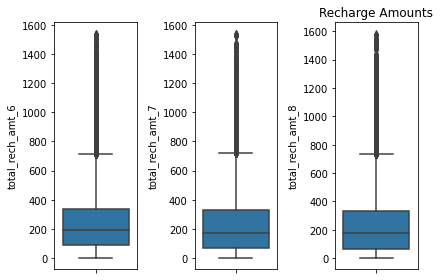

In [26]:
# Box plot for recharge amounts for 6,7,8 months
fig, axes = plt.subplots(1,3)

cols=['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
for name, ax in zip(cols, axes.flatten()):
    sns.boxplot(y=name , data=train_data, orient='h', ax=ax)
plt.title('Recharge Amounts')    
plt.tight_layout()

<font size="5">**Observation**:</font><br>
<font size="5">The median of recharge amounts is around ~200 </font>

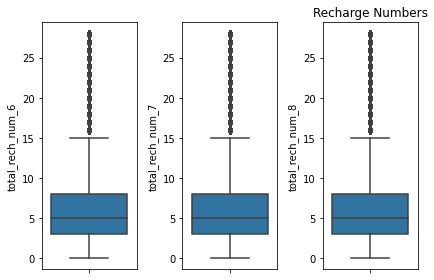

In [27]:
# Box plot for recharge Numbers for 6,7,8 months
fig, axes = plt.subplots(1,3)

cols=['total_rech_num_6','total_rech_num_7','total_rech_num_8']
for name, ax in zip(cols, axes.flatten()):
    sns.boxplot(y=name , data=train_data, orient='h', ax=ax)
plt.title('Recharge Numbers')    
plt.tight_layout()

<font size="5">**Observation**:</font><br>
<font size="5">The median of recharge numbers for 6,7,8 months is 5 </font>

# Bivariate Analysis

Text(0.5, 0.98, 'Incoming Calls Usage')

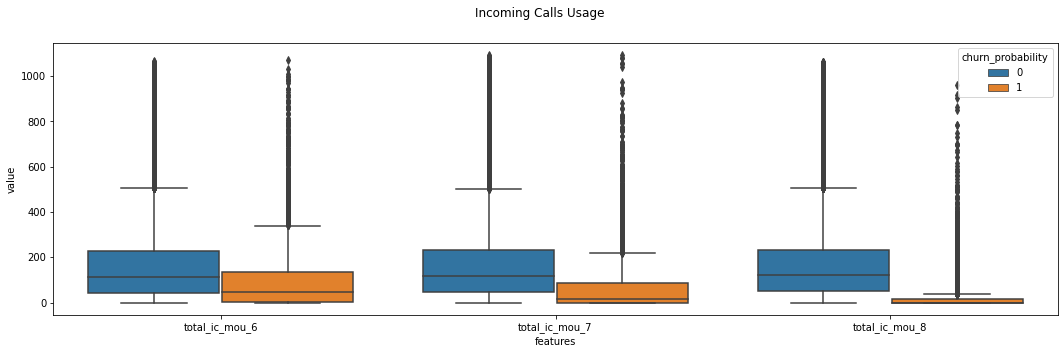

In [28]:
# Plot boxplot for incoming calls vs churn 
df_ic=train_data[["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8","churn_probability"]]
plt.figure(figsize=(18, 5))
X = pd.melt(df_ic,id_vars="churn_probability",var_name="features",value_name='value')
sns.boxplot(x="features", y="value", hue="churn_probability",data = X)  
plt.suptitle('Incoming Calls Usage')

<font size="5">**Observation**:</font><br>
<font size="5">The churn probability based on incoming calls for the 6th month is high and is lowest for 8th month </font>

Text(0.5, 0.98, 'Recharge Counts')

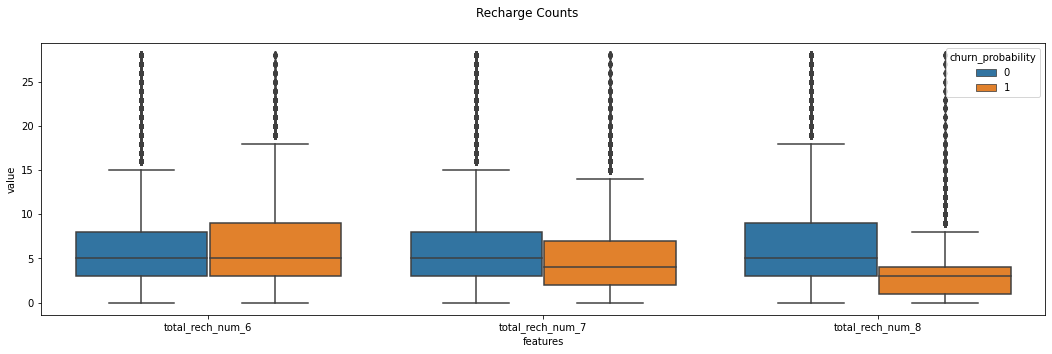

In [29]:

# Plot box plot between Recharge counts and Churn
df_ic=train_data[["total_rech_num_6","total_rech_num_7","total_rech_num_8","churn_probability"]]
plt.figure(figsize=(18, 5))
X = pd.melt(df_ic,id_vars="churn_probability",var_name="features",value_name='value')
sns.boxplot(x="features", y="value", hue="churn_probability",data = X)  
plt.suptitle('Recharge Counts')

<font size="5">**Observation**:</font><br>
<font size="5">The churn probability based on average revenue per user for the 6th month is high and is lowest for 8th month</font>

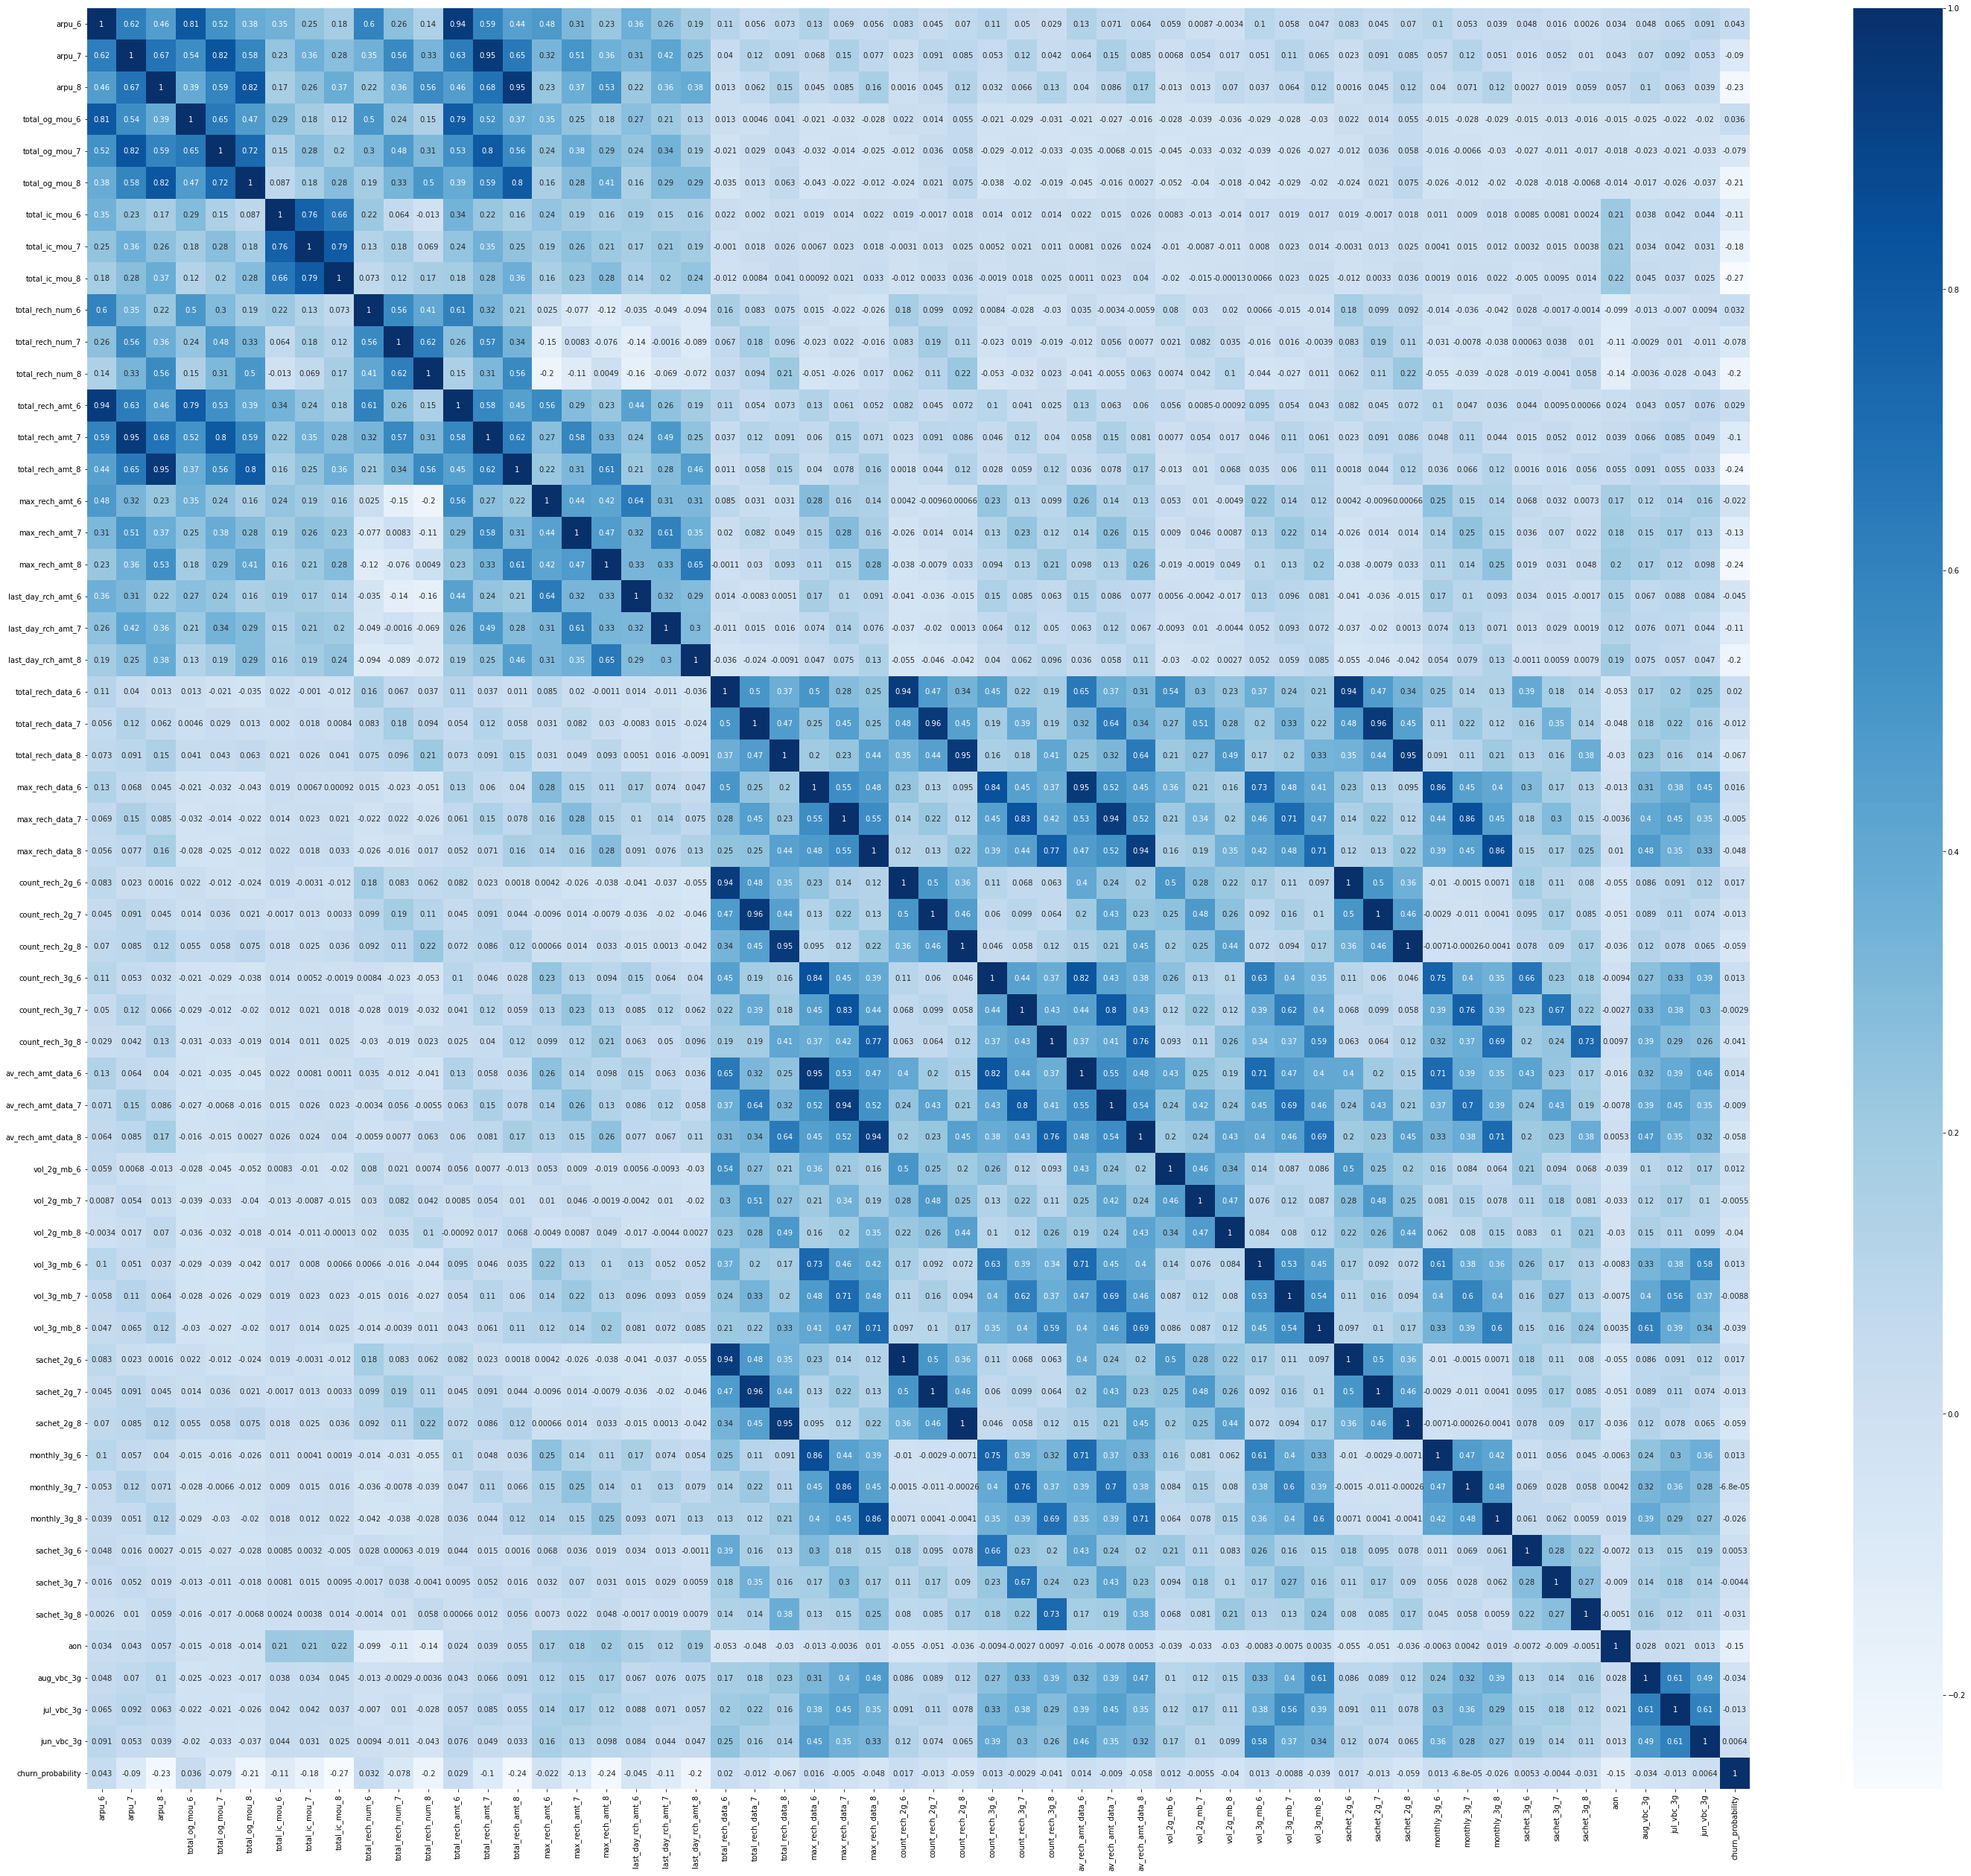

In [30]:
# Heatmap
plt.figure(figsize = (50,44))
sns.heatmap(train_data.corr(),cmap="Blues", annot=True)
plt.show()


<font size="5">**Observation**:</font><br>
<font size="5">The above heathmap shows there are strong correlations between the total incoming calls for 6,7,8 months, arpu6,arpu7, and vb_3g for months of June,July ,August</font>

# Splitting Dataset into Train set and Test Set

In [31]:
# Separate Features and target variables
X=train_data.iloc[:,:-1]
y=train_data['churn_probability']

# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

<font size="5">**Data Balancing**:</font><br>
<font size="5"> We have an imbalanced DataSet, So I will be using SMOTE</font><br>
<font size="5"> "Ultimate Question of Life, the Universe, and Everything", which, after eons of calculations, was given simply as "42"</font><br>
<font size="5"> So RANDOM STATE is set to 42!!!</font><br>

In [32]:
# Instantiate SMOTE
sm = SMOTE(random_state=42)
# Fit SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)
X_train.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,155.170,-5.000,2.500,286.29,0.00,0.00,59.08,0.00,0.00,6,...,0,0,0,0,0,0,479,0.0,0.0,0.0
1,91.300,113.764,73.781,120.31,145.88,92.04,159.83,174.51,75.16,4,...,0,0,0,0,0,0,1068,0.0,0.0,0.0
2,591.520,241.930,58.500,357.96,210.23,0.00,1069.24,633.14,0.00,3,...,0,0,0,0,0,0,289,0.0,0.0,0.0
3,29.969,105.287,54.394,20.58,28.94,28.11,9.03,13.98,6.78,1,...,0,0,0,0,0,0,626,0.0,0.0,0.0
4,366.158,411.051,296.316,540.39,669.03,561.64,488.54,543.49,508.03,3,...,0,0,0,0,0,0,251,0.0,0.0,0.0


# Feature Scaling

In [33]:
# Instantiate the Scaler
scaler = StandardScaler()
# Fit the data into scaler and transform
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
# Transform val/Testset
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])

# Feature Selection

In [34]:
# Use Randomforest for feature selection
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [35]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [36]:
# Check number of important features selected by randomforest
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

19

In [37]:
# Display Important features
selected_feat

Index(['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'aon'],
      dtype='object')

In [38]:
sel.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 11, 13, 14, 15, 16, 17, 18, 19,
       20, 51])

Text(0.5, 1.0, 'Feature Importance')

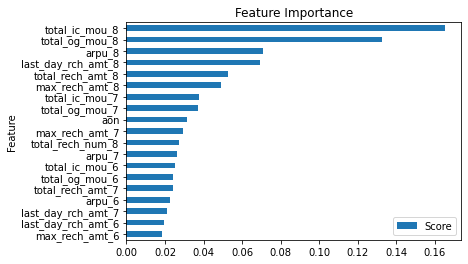

In [39]:
df_feature_imp=pd.DataFrame()
df_feature_imp['Feature']=selected_feat
df_feature_imp['Score']=[sel.estimator_.feature_importances_.ravel()[i] for i in sel.get_support(indices=True)]
df_feature_imp.sort_values(by='Score').plot.barh(x='Feature',y='Score')
plt.title('Feature Importance')

# Logistic Regression without PCA

In [40]:
# Creating common function for different models
def model_evaluation(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    
    # Confusion matrix
    confusion = confusion_matrix(actual, pred)
   
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    # Specificity
    Specificity= round(TN / float(TN+FP),2)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    #F1-Score
    f1_score=round(2*((prec_score*rec_score)/(prec_score+rec_score)),2)
    return {"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Recall":rec_score,"Precision":prec_score,"Specificity":Specificity,"ROC/AUC Score":roc_score,"F1-Score":f1_score,"Accuracy":acc_score}

In [41]:
# Build Logistic Regression using important features
X_New_train= X_train[selected_feat]
# Initialize the Logistic regression
model1 = LogisticRegression(random_state=42)
# fit the training data
model1.fit(X_New_train, y_train)
# predict the training data
Y_train_pred = model1.predict(X_New_train)
# predict the testing data
Y_test_pred = model1.predict(X_test[selected_feat])
# Model evaluation
train_eval=pd.DataFrame([model_evaluation(y_train, Y_train_pred)])
test_eval=pd.DataFrame([model_evaluation(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,29018,27154,6952,5088,85.08,80.67,0.80,82.35,82.82,82.35
test_data,901,6759,1744,191,82.51,34.06,0.79,81.00,48.22,79.83


# Principal Component Analysis (PCA)

In [42]:
# initialize the pca with randomized
pca = PCA( random_state=42)
# fit the training dataset
pca.fit(X_train)

PCA(random_state=42)

In [43]:
# Principal components
pca.components_

array([[ 7.78380762e-02,  1.23899400e-01,  1.23752134e-01, ...,
         1.48677627e-01,  1.51540025e-01,  1.33606340e-01],
       [ 1.91434146e-01,  2.75006138e-01,  2.58555757e-01, ...,
        -5.27733881e-02, -6.15397343e-02, -7.31098725e-02],
       [-7.52276979e-03, -4.40474244e-03, -1.82043012e-02, ...,
        -8.68405881e-02, -9.15369627e-02, -9.08310059e-02],
       ...,
       [-2.17201665e-16,  1.28633174e-16,  2.53921529e-17, ...,
        -2.08166817e-17,  1.11022302e-16, -8.32667268e-17],
       [-0.00000000e+00,  1.43114687e-16,  2.00363356e-16, ...,
        -0.00000000e+00, -8.67361738e-17, -8.32667268e-17],
       [ 0.00000000e+00,  2.51534904e-17, -1.35880924e-16, ...,
        -1.38777878e-17, -1.38777878e-16,  0.00000000e+00]])

In [44]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
variance_cumu

array([0.1983294 , 0.33372847, 0.42603075, 0.4956353 , 0.54385105,
       0.59050543, 0.63037885, 0.66285249, 0.69356901, 0.72128889,
       0.74554291, 0.76954921, 0.79246336, 0.8130405 , 0.82903598,
       0.84380889, 0.8578383 , 0.87082523, 0.88203262, 0.89258546,
       0.90275919, 0.91207561, 0.92041784, 0.92826318, 0.93523996,
       0.94169824, 0.94723211, 0.9524573 , 0.9575123 , 0.96230417,
       0.96690901, 0.97112135, 0.97518021, 0.97875893, 0.98172279,
       0.98425761, 0.98668092, 0.98876953, 0.99068581, 0.99251154,
       0.99373364, 0.99487168, 0.99572604, 0.99651358, 0.99726385,
       0.99787647, 0.99835094, 0.99881883, 0.99921845, 0.99950216,
       0.99976394, 1.        , 1.        , 1.        , 1.        ])

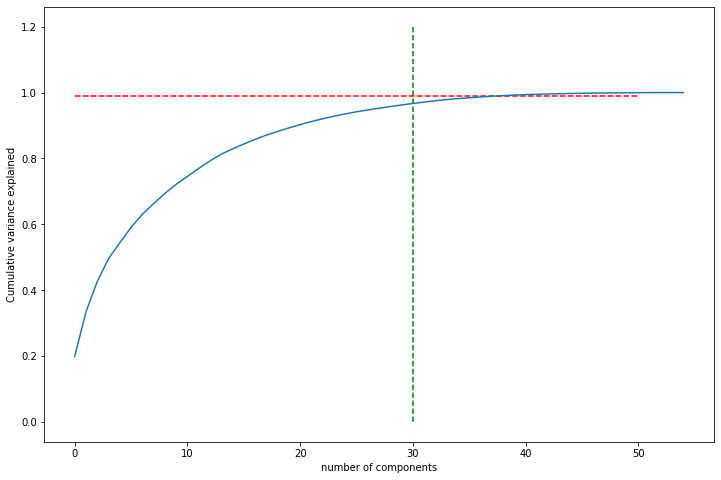

In [45]:
#Screeplot for the PCA components
fig = plt.figure(figsize=[12,8])
plt.vlines(x=30, ymax=1.2, ymin=0, colors="g", linestyles="--")
plt.hlines(y=0.99, xmax=50, xmin=0, colors="r", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Cumulative variance explained')
plt.show()

In [46]:
# Instantiate PCA with 30 components
pca_final = IncrementalPCA(n_components=30)
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

X_train_pca.shape

(68212, 30)

In [47]:
# Transofrm test data wtih pca
X_test_pca = pca_final.transform(X_test)

# Logistic Regression With PCA

In [48]:
# Creating KFold object with 10 splits
folds = KFold(n_splits=10, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [49]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.284346,0.016821,0.006538,0.000309,0.01,{'C': 0.01},0.844793,0.843851,0.852498,0.850859,...,0.848355,0.848865,0.848513,0.848222,0.848569,0.847842,0.847900,0.847704,0.848459,0.000549
1,0.288440,0.012243,0.006616,0.000436,0.1,{'C': 0.1},0.844502,0.844438,0.854567,0.852365,...,0.849071,0.849514,0.849393,0.849167,0.849514,0.848888,0.849073,0.848877,0.849391,0.000467
2,0.306537,0.053563,0.006725,0.001253,1,{'C': 1},0.844502,0.845025,0.854271,0.852365,...,0.849006,0.849579,0.849490,0.849200,0.849514,0.848953,0.849041,0.848844,0.849424,0.000517
3,0.279009,0.008561,0.006357,0.000128,10,{'C': 10},0.844502,0.845025,0.854271,0.852365,...,0.849006,0.849579,0.849556,0.849167,0.849547,0.848920,0.849041,0.848909,0.849433,0.000516
4,0.279392,0.007096,0.006362,0.000094,100,{'C': 100},0.844502,0.845025,0.854271,0.852365,...,0.849006,0.849579,0.849556,0.849167,0.849547,0.848920,0.849041,0.848909,0.849433,0.000516
5,0.290157,0.025290,0.007450,0.002934,1000,{'C': 1000},0.844502,0.845025,0.854271,0.852365,...,0.849006,0.849579,0.849556,0.849167,0.849547,0.848920,0.849041,0.848909,0.849437,0.000524


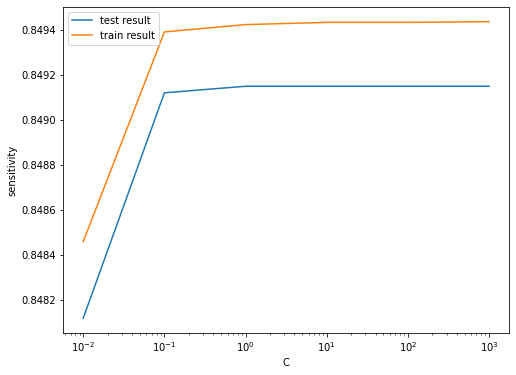

In [50]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [51]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8491495850778786 at C = 1


In [52]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(class_weight='balanced',C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

# predict the training data
Y_train_pred = log_pca_model.predict(X_train_pca)
# predict the testing data
Y_test_pred = log_pca_model.predict(X_test_pca)
# Model evaluation
train_eval=pd.DataFrame([model_evaluation(y_train, Y_train_pred)])
test_eval=pd.DataFrame([model_evaluation(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

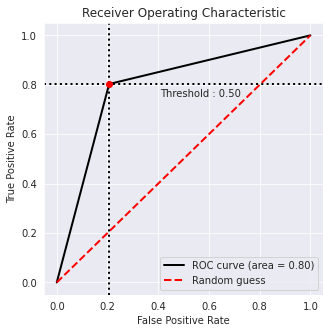

In [53]:
!pip install plot_metric
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, Y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [54]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,28969,27227,6879,5137,84.94,80.81,0.80,82.38,82.82,82.38
test_data,877,6747,1756,215,80.31,33.31,0.79,79.83,47.09,79.46


# Decision Tree Model

In [55]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10,20,10),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced',random_state=42)

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': range(10, 20, 10),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [56]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.834412,0.086642,0.007321,0.000474,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.778657,0.834482,0.827738,0.833162,0.836974,0.822203,0.021981,1
1,1.807649,0.004479,0.007075,0.000229,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.778657,0.834482,0.827738,0.833162,0.836974,0.822203,0.021981,1
2,1.745579,0.074216,0.007046,0.000224,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.770742,0.835655,0.825685,0.820408,0.819381,0.814374,0.022566,3
3,1.751345,0.079312,0.007221,0.000256,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.770742,0.835655,0.825685,0.820408,0.819381,0.814374,0.022566,3


In [57]:
# Printing the optimal sensitivity score and hyperparameters
print("Best score:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best score:- 0.8222026489580632
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=50, min_samples_split=50,
                       random_state=42)


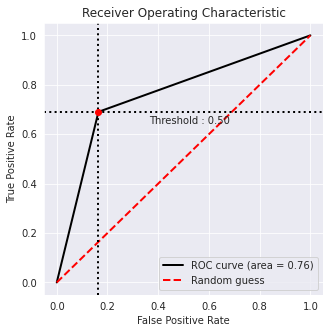

In [58]:
# Instantiate the model with best C
dt_pca = DecisionTreeClassifier(class_weight='balanced', criterion = "gini",max_depth=10,
                       min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

# Fit the model on the train set
dt_pca_model = dt_pca.fit(X_train_pca, y_train)

# predict the training data
Y_train_pred = dt_pca_model.predict(X_train_pca)
# predict the testing data
Y_test_pred = dt_pca_model.predict(X_test_pca)
# Model evaluation
train_eval=pd.DataFrame([model_evaluation(y_train, Y_train_pred)])
test_eval=pd.DataFrame([model_evaluation(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

# Visualisation with plot_metric
bc = BinaryClassification(y_test, Y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [59]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,28798,29212,4894,5308,84.44,85.47,0.86,85.04,84.95,85.04
test_data,754,7105,1398,338,69.05,35.04,0.84,76.30,46.49,81.91


# Random Forest Model

In [60]:
param_grid = {
    'max_depth': range(10,20,10),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'max_features': [20],
    'n_estimators':[300]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           verbose = 1,
                           n_jobs=-1,
                           scoring='recall',
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 20, 10), 'max_features': [20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [300]},
             return_train_score=True, scoring='recall', verbose=1)

In [61]:
print("Best Score",grid_search.best_score_)
print("Best Params",grid_search.best_params_)

Best Score 0.8351320461518142
Best Params {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


In [62]:
# Instantiate the model with best C
rfc_pca = RandomForestClassifier(class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=20,
                             n_estimators=300,
                       random_state=42)

# Fit the model on the train set
rfc_pca_model = rfc_pca.fit(X_train_pca, y_train)

# predict the training data
Y_train_pred = rfc_pca_model.predict(X_train_pca)
# predict the testing data
Y_test_pred = rfc_pca_model.predict(X_test_pca)
# Model evaluation
train_eval=pd.DataFrame([model_evaluation(y_train, Y_train_pred)])
test_eval=pd.DataFrame([model_evaluation(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

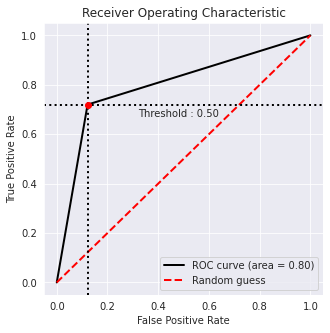

In [63]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, Y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [64]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,29196,30265,3841,4910,85.60,88.37,0.89,87.17,86.96,87.17
test_data,786,7470,1033,306,71.98,43.21,0.88,79.91,54.00,86.04


# XGBOOST Model

In [65]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 20, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 500,
        'seed': 42,

    }

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_pca, y_train), ( X_test_pca, y_test)]
    
    clf.fit(X_train_pca, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [66]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.8112558624283481
SCORE:
0.8128191766545075
SCORE:
0.8084418968212611
SCORE:
0.81156852527358
SCORE:
0.8078165711307973
SCORE:
0.8086503387180823
SCORE:
0.807920792079208
SCORE:
0.8080250130276185
SCORE:
0.8117769671704013
SCORE:
0.8088587806149036
SCORE:
0.8100052110474205
SCORE:
0.8113600833767587
SCORE:
0.8122980719124544
SCORE:
0.8118811881188119
SCORE:
0.8077123501823866
SCORE:
0.8084418968212611
SCORE:
0.8097967691505993
SCORE:
0.8101094319958312
SCORE:
0.8113600833767587
SCORE:
0.8116727462219906
SCORE:
0.812714955706097
SCORE:
0.8112558624283481
SCORE:
0.81156852527358
SCORE:
0.8073996873371547
SCORE:
0.8113600833767587
SCORE:
0.812714955706097
SCORE:
0.8110474205315268
SCORE:
0.8110474205315268
SCORE:
0.8106305367378843
SCORE:
0.8140698280354352
SCORE:
0.8117769671704013
SCORE:
0.8132360604481501
SCORE:
0.8112558624283481
SCORE:
0.8131318394997394
SCORE:
0.8103178738926524
SCORE:
0.8110474205315268
SCORE:
0.8117769671704013
SCORE:
0.8124022928608651
SCORE:
0.8097967691

In [67]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9788013744134247, 'gamma': 8.181526900396383, 'max_depth': 15.0, 'min_child_weight': 3.0, 'reg_alpha': 52.0, 'reg_lambda': 0.553252369205341}


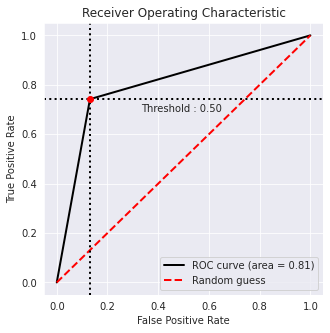

In [68]:
# Instantiate the model with best C
xgb_pca = XGBClassifier(objective = 'binary:logistic',
                         colsample_bytree=0.702068970235341,
                            max_depth= 10,
                            min_child_weight= 8.0,
                            reg_alpha=105.0,
                            seed= 42,
                            gamma=7.538408376768269,
                            reg_lambda=0.8946625863735224,
                           
                        )

# Fit the model on the train set
xgb_pca_model = xgb_pca.fit(X_train_pca, y_train)

# predict the training data
Y_train_pred = xgb_pca_model.predict(X_train_pca)
# predict the testing data
Y_test_pred = xgb_pca_model.predict(X_test_pca)
# Model evaluation
train_eval=pd.DataFrame([model_evaluation(y_train, Y_train_pred)])
test_eval=pd.DataFrame([model_evaluation(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

# Visualisation with plot_metric
bc = BinaryClassification(y_test, Y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [69]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,29778,29884,4222,4328,87.31,87.58,0.88,87.47,87.44,87.47
test_data,810,7390,1113,282,74.18,42.12,0.87,80.54,53.73,85.46


<font size="5">**Observation**:</font><br>
<font size="5">Of all the models XGBoost with PCA has better accuracy on unseen data compared to other models with unseen data accuracy around ~0.80</font>


# Model prediction on Unseen Data

In [70]:
# Load the unseen data
unseen_data=pd.read_csv('/kaggle/input/telecom-churn-case-study-hackathon-38/test (1).csv')
unseen_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [71]:
# Identify the Recharge columns
recharge_cols = [k for k in train_data.columns.to_list() if 'rech' in k]
# Impute Recharge columns with 0
for col in recharge_cols:
    unseen_data[col]=unseen_data[col].fillna(0)

# Select the columns used in train data
unseen_df=unseen_data[X_train.columns]
unseen_df[unseen_df.columns]=scaler.transform(unseen_df[unseen_df.columns])

# Transofrm test data wtih pca
unseen_data_pca = pca_final.transform(unseen_df)

In [72]:
# predict the unseen data
#LR_unseen_pred = logistic_pca.predict(unseen_data_pca)
preds=xgb_pca_model.predict(unseen_data_pca)

# Save Predictions

In [73]:
sample=pd.read_csv('/kaggle/input/telecom-churn-case-study-hackathon-38/solution (1).csv')
sample['churn_probability']=preds#LR_unseen_pred
sample.to_csv('Submission_xgb.csv',index=False)